#1. Loading the Data

Importing the required libraries

In [ ]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Loading the Dataset

In [ ]:
with open("/content/transactions.txt") as f:
  data=f.read()

In [ ]:
out_file = open("data.json", "w")
json.dump(data, out_file)
out_file.close()

In [ ]:
f = open('/content/data.json')
data = json.load(f)

In [ ]:
df = pd.read_json(data, lines=True)

Taking a Glimpse of Data

In [ ]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


Structure of Data

In [ ]:
rows, columns = df.shape
print("Data contains {} rows and {} columns".format(rows,columns))

Data contains 786363 rows and 29 columns


Data Summary

In [ ]:
data_summary = df.describe()
data_summary = data_summary[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']]
data_summary

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)

Finding number and percentage of null values in each field

In [ ]:
null_values_data = df.isnull().sum()
null_percentage_data = df.isnull().sum()/len(df)*100

In [ ]:
pd.DataFrame(null_values_data, columns=['Number of Null Values'])

,Number of Null Values
accountNumber,0
customerId,0
creditLimit,0
availableMoney,0
transactionDateTime,0
transactionAmount,0
merchantName,0
acqCountry,4562
merchantCountryCode,724
posEntryMode,4054


In [ ]:
pd.DataFrame(null_percentage_data, columns=['Percentage of Null Values'])

,Percentage of Null Values
accountNumber,0.000000
customerId,0.000000
creditLimit,0.000000
availableMoney,0.000000
transactionDateTime,0.000000
transactionAmount,0.000000
merchantName,0.000000
acqCountry,0.580139
merchantCountryCode,0.092069
posEntryMode,0.515538


Removing Fields 'echoBuffer', 'merchantCity', 'merchantZip', 'posOnPremises' and 'recurringAuthInd' as every value in these fields is null

In [ ]:
df = df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1)

Finding number of unique values in some appropriate fields



In [ ]:
fields = []
unique_values = []
unappropriate_columns = ['creditLimit', 'availableMoney', 'transactionDateTime', 'transactionAmount',
                      'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV',
                      'cardLast4Digits', 'currentBalance']
for col in df:
  if col not in unappropriate_columns:
    fields.append(col)
    unique_values.append(len(df[col].unique()))

unique_values_data = pd.DataFrame(list(zip(fields, unique_values)),columns =['Fields', 'Number Of Unique Values'])
unique_values_data

,Fields,Number Of Unique Values
0,accountNumber,5000
1,customerId,5000
2,merchantName,2490
3,acqCountry,5
4,merchantCountryCode,5
5,posEntryMode,6
6,posConditionCode,4
7,merchantCategoryCode,19
8,currentExpDate,165
9,transactionType,4


#2. Plot

Finding processed amounts for each type of transaction

<BarContainer object of 3 artists>

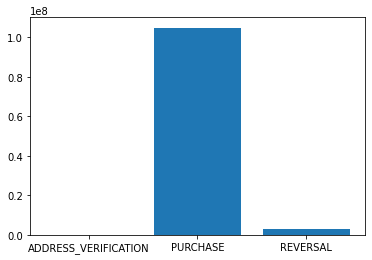

In [ ]:
df_txns=df.groupby('transactionType')['transactionAmount'].sum()
df_txns = dict(df_txns)
plt.bar(df_txns.keys(),df_txns.values())

In [ ]:
df_txns

{'ADDRESS_VERIFICATION': 0.0, 'PURCHASE': 104790305.25, 'REVERSAL': 2821792.5}

It can be inferred from the data and plot above that the total sum of amounts processed by 'ADDRESS_VERIFICATION' type of transactions is zero and the sum of amount processed is maximum for 'PURCHASE' type of transactions

#3. Data Wrangling - Duplicate Transactions



*   Finding Reversal Transactions



In [ ]:
data_reverse_txns = df[df['transactionType']=='REVERSAL']
total_amount = data_reverse_txns['transactionAmount'].sum()
rows, cols = data_reverse_txns.shape
print("There are total {} reverse type transactions which sum upto to ${}".format(rows, total_amount))

There are total 20303 reverse type transactions which sum upto to $2821792.5


*   Finding multi-swipe transactions

In [ ]:
data_multiswipe = df[df['transactionType']!='REVERSAL']

In [ ]:
unique_customers = data_multiswipe['accountNumber'].unique()

In [ ]:
records=0
total_amount_sum=0
for customer in unique_customers:
  customer_txns = data_multiswipe[data_multiswipe['customerId']==customer]
  customer_txns['Date'] = customer_txns['transactionDateTime'].apply(lambda x: x.split('T')[0])
  customer_txns['Time/Hour'] = customer_txns['transactionDateTime'].apply(lambda x: (x.split('T')[1]).split(':')[0])
  customer_txns = customer_txns[customer_txns.duplicated('Date', keep=False)]
  for date in customer_txns['Date'].unique():
    same_date_data = customer_txns[customer_txns['Date']==date]
    same_date_data = same_date_data[same_date_data.duplicated('Time/Hour', keep=False)]
    records=records+len(same_date_data)
    total_amount_sum = total_amount_sum + same_date_data['transactionAmount'].sum()

In [ ]:
print("There are total {} multi-swipe type transactions which sum upto to ${}".format(records, total_amount_sum))

There are total 137962 multi-swipe type transactions which sum upto to $19981722.569999963


It can be inferred that the average amount per transaction for both the Reversed and multi swipe transaction is very close to each other.

#4. Model

Dropping null values as the percentage of null values for each column is less than 1 percent

In [ ]:
df = df.dropna()

Finding and removing highly correlated features from the dataset

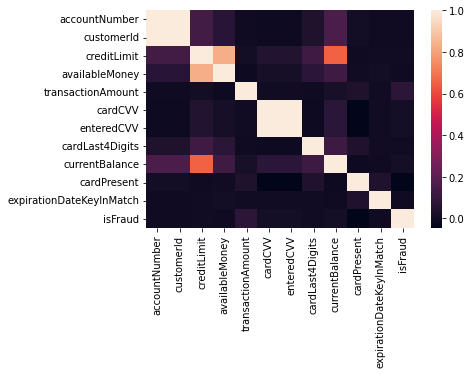

In [ ]:
sns.heatmap(df.corr())

Dropping Highly correlated and unappropriate features 

In [ ]:
df = df.drop(['accountNumber', 'customerId', 'transactionDateTime', 'creditLimit', 'currentExpDate', 'accountOpenDate','dateOfLastAddressChange'], axis=1)

Converting all the categorical values to numeric

In [ ]:
df.dtypes

availableMoney              float64
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
isFraud                        bool
dtype: object

In [ ]:
len(df['merchantName'].unique())

2489

In [ ]:
len(df['merchantCategoryCode'].unique())

19

Used Label Encoder to convert string values in fields 'merchantName' and 'merchantCategoryCode' to integers as the they have a large number of unique values, hence one-hot encoding or dummies will unnecessarily increase the dimensions of data to a great extent



 

In [ ]:
le = LabelEncoder()
df['nameMerchant'] = le.fit_transform(df['merchantName'])
df['mcc'] = le.fit_transform(df['merchantCategoryCode'])
country = pd.get_dummies(df['acqCountry'])
merchant_country = pd.get_dummies(df['merchantCountryCode'])
posentry = pd.get_dummies(df['posEntryMode'])
poscond = pd.get_dummies(df['posConditionCode'])
merchant_names = pd.get_dummies(df['transactionType'])

df=pd.concat([df, country, merchant_country, posentry, poscond, merchant_names], axis=1)
df=df.drop(['merchantName', 'merchantCategoryCode', 'acqCountry', 'merchantCountryCode', 'posEntryMode',
                        'posConditionCode', 'transactionType'], axis=1)

In [ ]:
df['cardPresent'] = le.fit_transform(df['cardPresent'])
df['expirationDateKeyInMatch'] = le.fit_transform(df['expirationDateKeyInMatch'])
df['isFraud'] = le.fit_transform(df['isFraud'])

In [ ]:
print(le.classes_)

[False  True]


The dataset is highly imbalanced as it contains 98 percent of the transactions which belongs to the class isFraud=False

In [ ]:
df['isFraud'].value_counts()/len(df)*100

0    98.459316
1     1.540684
Name: isFraud, dtype: float64

*   Here sampling techniques couldn't work as equalizing the number of samples in minority class to the majority class will require a huge number of fake sample generations which belong to the minority class and generating so many fake samples make model shift a lot from reality.
*   Therefore equalizing the number of samples in the majority class with that of minority by chossing some random samples from the dataset belonging to the majority class



In [ ]:
df_fraud = df[df['isFraud']==1]
df_notfraud = df[df['isFraud']==0]
df_notfraud = df.sample(n=11966)
df_final = df_fraud.append(df_notfraud)

In [ ]:
df_final['isFraud'].value_counts()

1    12151
0    11781
Name: isFraud, dtype: int64

In [ ]:
x = df_final.drop(['isFraud'], axis=1)
y = df_final['isFraud'].values

Dividing the data into 70% training and 30% testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Training the models


1.   Random Forest Classifier





In [ ]:
rf_model=RandomForestClassifier(n_estimators = 20)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)


2.   Logistic Regression Classifier



In [ ]:
lr_model=LogisticRegression()
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Model Performance using Random Forest Classifier

In [ ]:
y_pred=rf_model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[2638,  941],
       [1017, 2584]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      3579
           1       0.73      0.72      0.73      3601

    accuracy                           0.73      7180
   macro avg       0.73      0.73      0.73      7180
weighted avg       0.73      0.73      0.73      7180



Model performance using Logistic Regression Classifier

In [ ]:
y_pred=lr_model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[2001, 1578],
       [1239, 2362]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59      3579
           1       0.60      0.66      0.63      3601

    accuracy                           0.61      7180
   macro avg       0.61      0.61      0.61      7180
weighted avg       0.61      0.61      0.61      7180



Further feature selection algorithms can be used to catch the most important features along with outlier removal and then the model can be trained using deep learning technique to improve the performance. Also Synthetic Minority Oversampling Technique can be used to remove imbalance in the dataset so as to increase the model's performance.